# Exploritory Data Analysis 
## Predicting the Spread of Antibiotic Resistance" Dat-Driven Insights from Antibiotic Usage
### Laura Dooley 


In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy    as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit




## Data cleaning and processing
1. Merge files in directories in 'data' directory
    a. resistance directory
    b. saar directory

In [16]:
def combine_csv_files(input_folder, output_file):
    # Check if the output file already exists
    if os.path.exists(output_file):
        print(f"The output file '{output_file}' already exists. No changes were made.")
        return
    
    # List to hold dataframes
    dataframes = []
    
    # Iterate over all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            file_path = os.path.join(input_folder, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    # Concatenate all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Save the combined dataframe to the specified output file
    combined_df.to_csv(output_file, index=False)
    print(f"All CSV files from {input_folder} have been combined and saved to {output_file}.")

# Create Combined file
input_folder = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\saar'
output_folder = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\saar.csv'

input_folder2 = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\resistance'
output_folder2 = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\resistance.csv'

combine_csv_files(input_folder, output_folder)
combine_csv_files(input_folder2, output_folder2)


The output file 'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\saar.csv' already exists. No changes were made.
The output file 'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\resistance.csv' already exists. No changes were made.


2. Summarize the 4 files in 'data' directory that will be used for analysis
    

In [17]:
def summarize_csv(file):
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Get the number of rows and columns
    num_rows, num_columns = df.shape
    
    # Get column names and data types
    column_info = df.dtypes
    
    # Get summary statistics for numerical columns
    summary_stats = df.describe()
    
    # Count missing values in each column
    missing_values = df.isnull().sum()
    
    # Get percentage of missing values in each column
    missing_percentage = (missing_values / num_rows) * 100
    
    # Print the summary
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")
    print("\nColumn Information:")
    print(column_info)
    print("\nSummary Statistics for Numerical Columns:")
    print(summary_stats)
    print("\nMissing Values per Column:")
    print(missing_values)
    print("\nPercentage of Missing Values per Column:")
    print(missing_percentage)

# data variables 
file = 'antibiotics_sales.csv'
file2 = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\resistance.csv'
file3 = r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\saar.csv'




    a. Antibiotic Sales 

In [18]:
#antibiotic_sales.csv
summarize_csv(file)

Number of rows: 12
Number of columns: 4

Column Information:
year                       int64
livestock_antibiotic     float64
human_medicine           float64
Livestock_sales          float64
dtype: object

Summary Statistics for Numerical Columns:
              year  livestock_antibiotic   human_medicine  Livestock_sales
count    12.000000              12.000000       12.000000        12.000000
mean   2014.500000               7.800000        3.240000        70.141667
std       3.605551               1.485934        0.252407         4.526781
min    2009.000000               5.560000        2.560000        61.600000
25%    2011.750000               6.150000        3.160000        67.900000
50%    2014.500000               8.250000        3.310000        70.900000
75%    2017.250000               8.972500        3.405000        74.375000
max    2020.000000               9.700000        3.490000        75.300000

Missing Values per Column:
year                     0
livestock_antibiotic

    b. Antibiotic Resistance 

In [19]:
#resistance.csv
summarize_csv(file2)

Number of rows: 180960
Number of columns: 10

Column Information:
phenotype        object
State            object
eventtype        object
year              int64
agecat           object
numTested        object
numNonSuscep     object
pctNonSuscep     object
Suppress         object
displayTested    object
dtype: object

Summary Statistics for Numerical Columns:
                year
count  180960.000000
mean     2015.500000
std         2.872289
min      2011.000000
25%      2013.000000
50%      2015.500000
75%      2018.000000
max      2020.000000

Missing Values per Column:
phenotype             0
State                 0
eventtype             0
year                  0
agecat                0
numTested          7934
numNonSuscep      11803
pctNonSuscep      11803
Suppress          63931
displayTested    102433
dtype: int64

Percentage of Missing Values per Column:
phenotype         0.000000
State             0.000000
eventtype         0.000000
year              0.000000
agecat           

In [65]:
summarize_csv(file3)

Number of rows: 416
Number of columns: 19

Column Information:
SAAR Population                                                   object
Agent                                                             object
Event Year                                                         int64
State                                                             object
ID State                                                           int64
No. of facilities reporting SAARs                                  int64
No. of facilities eligible to report SAARs                         int64
Percentage of eligible facilities reporting                       object
Observed Antimicrobial Days                                      float64
Predicted Antimicrobial Days                                     float64
Days Present                                                     float64
No. Facilities Included in Distribution                          float64
10th Percentile                                              

## Standardized Antimicrobial Administration Ratio

In [20]:
# saar.csv
summarize_csv(file3)

Number of rows: 416
Number of columns: 19

Column Information:
SAAR Population                                                   object
Agent                                                             object
Event Year                                                         int64
State                                                             object
ID State                                                           int64
No. of facilities reporting SAARs                                  int64
No. of facilities eligible to report SAARs                         int64
Percentage of eligible facilities reporting                       object
Observed Antimicrobial Days                                      float64
Predicted Antimicrobial Days                                     float64
Days Present                                                     float64
No. Facilities Included in Distribution                          float64
10th Percentile                                              

3. Keep only relevent imformation from resistance.csv and saar.csv  
    a. For resistance.csv remove "All" in 'agecat' column
    b. For resistance.csv keep columns "year", "state", "agecat" and "pctnonsuscep"
    c. change data type for "pctNonSuscep" to int
    d. standarize "pctNonSuscep"

In [ ]:

# Specify the output file path 
output_file_path = 'updated_resistance.csv'

# Check if the output file already exists
if os.path.exists(output_file_path):
    print(f"The output file '{output_file_path}' already exists. No changes were made.")
else:
    # Load the CSV file
    df = pd.read_csv(r'C:\Users\laura\OneDrive\Documents\capstone-dooley\data\resistance.csv')

    #  Convert 'State' column to state_id
    state_mapping = {
        'AL': 1, 'AK': 2, 'AZ': 3, 'AR': 4, 'CA': 5, 'CO': 6, 'CT': 7, 'DE': 8, 'DC': 9, 'FL': 10,
        'GA': 11, 'HI': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'IA': 16, 'KS': 17, 'KY': 18, 'LA': 19,
        'ME': 20, 'MD': 21, 'MA': 22, 'MI': 23, 'MN': 24, 'MS': 25, 'MO': 26, 'MT': 27, 'NE': 28,
        'NV': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NY': 33, 'NC': 34, 'ND': 35, 'OH': 36, 'OK': 37,
        'OR': 38, 'PA': 39, 'RI': 40, 'SC': 41, 'SD': 42, 'TN': 43, 'TX': 44, 'UT': 45, 'VT': 46,
        'VA': 47, 'WA': 48, 'WV': 49, 'WI': 50, 'WY': 51, 'PR': 52  # Added PR for Puerto Rico
    }

    df['state_id'] = df['State'].map(state_mapping)

    
    #  Convert 'phenotype' column to phenotype_id
    phenotype_mapping = {
        'Acinetobacter_Carbapenems': 1,
        'Acinetobacter_MDR': 2,
        'CNS_Vanc': 3,
        'CREall': 4,
        'E.faecalis_Dapto': 5,
        'E.faecalis_VRE': 6,
        'E.faecium_Dapto': 7,
        'E.faecium_VRE': 8,
        'Ecoli_CRE': 9,
        'Ecoli_ESCeph': 10,
        'Ecoli_Fluoroq': 11,
        'Ecoli_MDR': 12,
        'Entb_Cefepime': 13,
        'Entb_CRE': 14,
        'Entb_MDR': 15,
        'Klebsiella_CRE': 16,
        'Klebsiella_ESCeph': 17,
        'Klebsiella_MDR': 18,
        'MRSA': 19,
        'MRSA_Dapto': 20,
        'MRSA_Fluoroq': 21,
        'MRSA_Linezolid': 22,
        'MRSA_Vanc': 23,
        'P.aeruginosa_Amino': 24,
        'P.aeruginosa_Carbapenems': 25,
        'P.aeruginosa_ESCeph': 26,
        'P.aeruginosa_Fluoroq': 27,
        'P.aeruginosa_MDR': 28,
        'P.aeruginosa_PiPTaz': 29
    }

    df['phenotype_id'] = df['phenotype'].map(phenotype_mapping)
    
    
    # Remove rows where the 'agecat' column is "All"
    df = df[df['agecat'] != "All"]

    # Create new column 'r_present' based on 'Suppress' values
    df['r_present'] = df['Suppress'].apply(lambda x: 0 if x in ['LowCount', 'Zero'] else 1)

    # Convert 'agecat' column to agecat_id
    agecat_mapping = {
        'Adult': 0,  
        'Peds': 1
    }
    df['agecat_id'] = df['agecat'].map(agecat_mapping)

    # Convert 'eventtype' column to eventtype_id
    eventtype_mapping = {
        'All': 1,  
        'CAUTI': 2,
        'CLABSI': 3,
        'SSI': 4
    }
    df['eventtype_id'] = df['eventtype'].map(eventtype_mapping)

    # Step 4: Convert columns to integers
    df['pctNonSuscep'] = pd.to_numeric(df['pctNonSuscep'], errors='coerce').fillna(0).astype(int)
    df['numTested'] = pd.to_numeric(df['numTested'], errors='coerce').fillna(0).astype(int)
    df['numNonSuscep'] = pd.to_numeric(df['numNonSuscep'], errors='coerce').fillna(0).astype(int)

    # Save the updated DataFrame to a new file
    df.to_csv(output_file_path, index=False)
    print(f"Rows with 'All' in the 'agecat', 'pctNonSuscep', 'numTested', and 'numNonSuscep' converted to integers, categorized columns, and data standardized. Saved to {output_file_path}")


The output file 'updated_resistance.csv' already exists. No changes were made.


    c. For saar.csv keep columns "year" , "state", "observed antimicrobial days", and "predicted antimicrobial days"
    d. For saar.csv add column "saar" which is "observed antimicrobial days"/ "predicited antimicrobial days"

In [22]:
# Mapping of full state names to state abbreviations
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "Puerto Rico":"PR", "District of Columbia": "DC"
}

# Specify the output file path
output_file = 'update_saar.csv'

# Check if the output file already exists
if os.path.exists(output_file):
    print(f"The output file '{output_file}' already exists. No changes were made.")
else:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file3)

    # Ensure there are no zero values in 'Predicted Antimicrobial Days'
    if (df['Predicted Antimicrobial Days'] == 0).any():
        print("Warning: Found zero values in 'Predicted Antimicrobial Days'. These will be replaced with NaN.")
        df['Predicted Antimicrobial Days'].replace(0, pd.NA, inplace=True)

    # Add a new column named 'SAAR' while handling division safely
    df['SAAR'] = df['Observed Antimicrobial Days'] / df['Predicted Antimicrobial Days']

    # Convert the 'SAAR' column to float with 4 decimal places
    df['SAAR'] = df['SAAR'].astype(float).round(4)

    # Keep only the specified columns
    columns_to_keep = ["Event Year", "State", "Observed Antimicrobial Days", 
                       "Predicted Antimicrobial Days", "SAAR"]
    df = df[columns_to_keep]

    # Replace state names with abbreviations in the 'State' column
    df['State'] = df['State'].map(state_abbreviations).fillna(df['State'])

    # Save the updated DataFrame to a new file
    df.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")

The output file 'update_saar.csv' already exists. No changes were made.


4. make a new file with the average SAAR and Average resistance per state. 

In [38]:

def calculate_average_per_state(file_name, column_name, state_column, existing_df=None):
    """
    Calculates the average of a specific column per state and appends it to an existing DataFrame if provided.
    """
    # Load the dataset
    df = pd.read_csv(file_name)
    
    # Ensure the specified column is numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Handle NaN values by filling them with 0
    df[column_name] = df[column_name].fillna(0)
    
    # Calculate the average of the specified column per state
    average_per_state = df.groupby(state_column)[column_name].mean().reset_index()
    
    # Rename columns for clarity
    average_per_state.columns = [state_column, f'avg_{column_name}']
    
    # If an existing DataFrame is provided, merge with it
    if existing_df is not None:
        result_df = pd.merge(existing_df, average_per_state, on=state_column, how='outer')
    else:
        # Otherwise, use the current averages as the result
        result_df = average_per_state
    
    return result_df

# Initialize an empty DataFrame for merging
combined_df = None

# Calculate averages and merge into a single DataFrame
combined_df = calculate_average_per_state("update_saar.csv", "SAAR", "State", combined_df)
combined_df = calculate_average_per_state("updated_resistance.csv", "pctNonSuscep", "State", combined_df)

# Save the final result to avg_state.csv
combined_df.to_csv("avg_state.csv", index=False)

# Display the final DataFrame
print(combined_df)


   State  avg_SAAR  avg_pctNonSuscep
0     AK  0.000000          0.323276
1     AL  0.353875          5.489224
2     AR  0.378725          3.671121
3     AZ  0.254575          5.081897
4     CA  0.982988         11.435776
5     CO  0.483175          3.415948
6     CT  0.331825          3.165086
7     DC  0.000000          2.513362
8     DE  0.000000          1.137931
9     FL  0.994412          9.245690
10    GA  0.921362          7.398276
11    HI  0.000000          0.555172
12    IA  0.335900          1.609052
13    ID  0.202613          0.787931
14    IL  0.808775          7.715517
15    IN  0.851263          5.213362
16    KS  0.343100          2.643966
17    KY  0.606800          5.467672
18    LA  0.727600          5.367241
19    MA  0.427400          6.025431
20    MD  0.478675          5.219397
21    ME  0.337900          1.051724
22    MI  0.535775          6.817672
23    MN  0.637512          3.445259
24    MO  0.824512          5.078879
25    MS  0.397175          4.856034
2

In [63]:
summarize_csv('updated_resistance.csv')

Number of rows: 120640
Number of columns: 15

Column Information:
phenotype        object
State            object
eventtype        object
year              int64
agecat           object
numTested         int64
numNonSuscep      int64
pctNonSuscep      int64
Suppress         object
displayTested    object
state_id          int64
phenotype_id      int64
r_present         int64
agecat_id         int64
eventtype_id      int64
dtype: object

Summary Statistics for Numerical Columns:
                year      numTested   numNonSuscep   pctNonSuscep  \
count  120640.000000  120640.000000  120640.000000  120640.000000   
mean     2015.500000      32.359731       5.182924       4.170433   
std         2.872293     114.214508      26.286852      12.412488   
min      2011.000000       0.000000       0.000000       0.000000   
25%      2013.000000       0.000000       0.000000       0.000000   
50%      2015.500000       0.000000       0.000000       0.000000   
75%      2018.000000      23.00000

In [64]:
summarize_csv('avg_state.csv')

Number of rows: 52
Number of columns: 3

Column Information:
State                object
avg_SAAR            float64
avg_pctNonSuscep    float64
dtype: object

Summary Statistics for Numerical Columns:
        avg_SAAR  avg_pctNonSuscep
count  52.000000         52.000000
mean    0.469591          4.170433
std     0.319564          2.970695
min     0.000000          0.000000
25%     0.296144          1.440625
50%     0.473662          3.617888
75%     0.723044          6.044073
max     1.001912         11.435776

Missing Values per Column:
State               0
avg_SAAR            0
avg_pctNonSuscep    0
dtype: int64

Percentage of Missing Values per Column:
State               0.0
avg_SAAR            0.0
avg_pctNonSuscep    0.0
dtype: float64


1. Line graph of the antibotics sold for human and livestock between 2009 to 2020

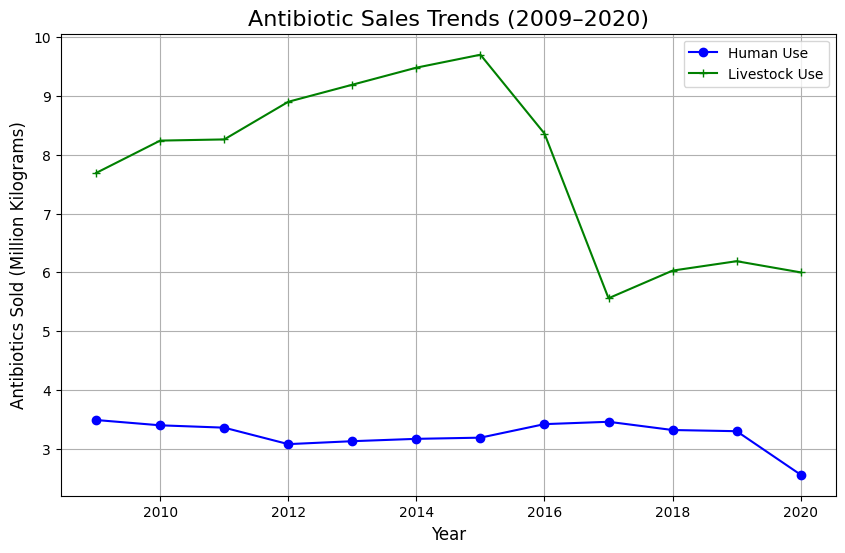

In [4]:

# Load the data from the CSV file
sales_df = pd.read_csv('antibiotics_sales.csv')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(sales_df['year'], sales_df['human_medicine'], marker='o', linestyle='-', color='b', label='Human Use')
plt.plot(sales_df['year'], sales_df['livestock_antibiotic '], marker= '+', linestyle= '-', color= 'green', label= "Livestock Use")

# Adding titles and labels
plt.title('Antibiotic Sales Trends (2009–2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Antibiotics Sold (Million Kilograms)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Display the plot
plt.show()



2. line graph of antibiotic resistant bacteria 

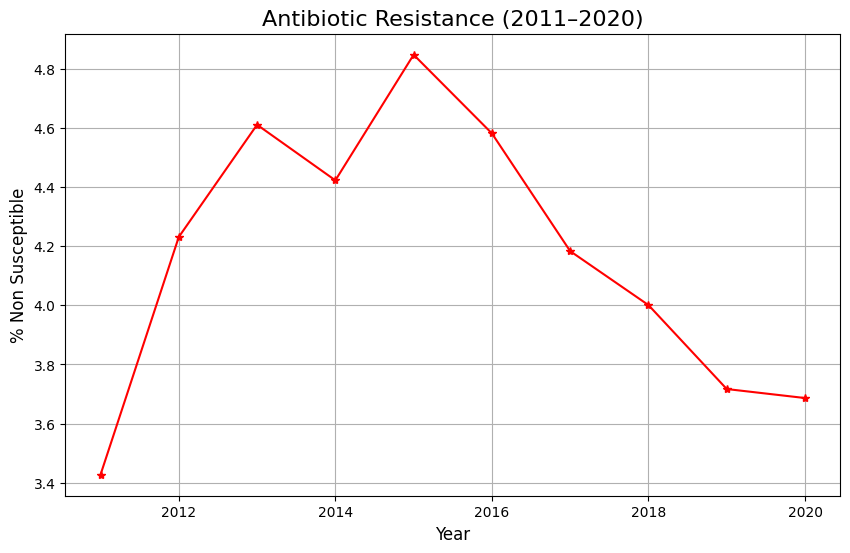

In [26]:
df = pd.read_csv('updated_resistance.csv')

# Convert pctNonSuscep to numeric, invalid parsing will result in NaN
df['pctNonSuscep'] = pd.to_numeric(df['pctNonSuscep'], errors='coerce')

# Drop rows with NaN values in pctNonSuscep
df.dropna(subset=['pctNonSuscep'], inplace=True)

# Now perform the groupby and calculate the mean
resistance_data = df.groupby('year')['pctNonSuscep'].mean()

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(resistance_data.index, resistance_data.values, marker='*', linestyle='-', color='red')

# Adding titles and labels
plt.title('Antibiotic Resistance (2011–2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('% Non Susceptible', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


3.  Evaluate: The 2 graph have similar patterens. 
    a. increasing 2011 - 2013
    b. highest peak in 2015.
    c. declining after 2015
    

4. A scatter plot 

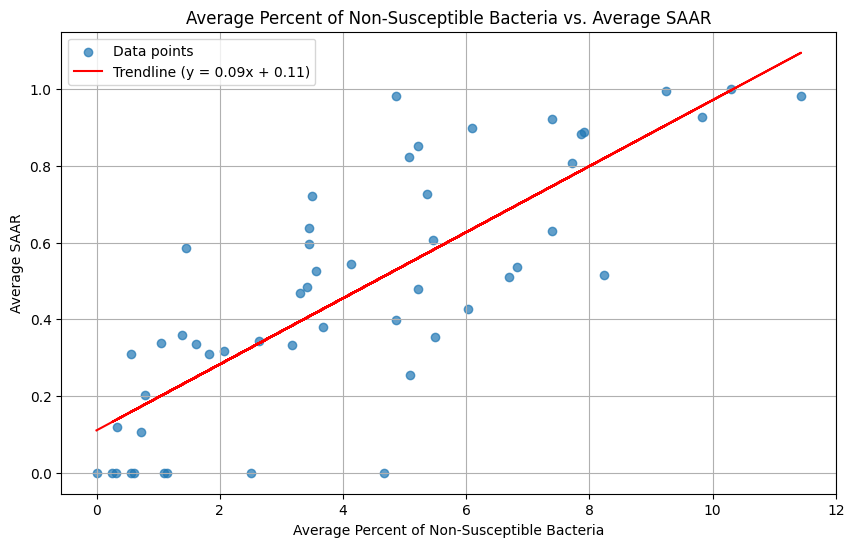

In [ ]:
# Load the dataset
data = pd.read_csv('avg_state.csv')

# Handle NaN values by dropping rows with NaN values
data = data.dropna(subset=['avg_pctNonSuscep', 'avg_SAAR'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['avg_pctNonSuscep'], data['avg_SAAR'], alpha=0.7, label="Data points")

# Fit a linear model for the trendline
coeffs = np.polyfit(data['avg_pctNonSuscep'], data['avg_SAAR'], 1)  # Degree 1 for linear fit
trendline = np.polyval(coeffs, data['avg_pctNonSuscep'])

# Plot the trendline
plt.plot(data['avg_pctNonSuscep'], trendline, color='red', label=f"Trendline (y = {coeffs[0]:.2f}x + {coeffs[1]:.2f})")

# Add title and labels
plt.title('Average Percent of Non-Susceptible Bacteria vs. Average SAAR ')
plt.xlabel('Average Percent of Non-Susceptible Bacteria')
plt.ylabel('Average SAAR')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


5. Evaluating the scatterplot
    a. positive linear relationahip
    b. a correlation present as the SAAR increases the antibiotic resistance increases
    